# <ins>AML_2203 Final Project:</ins>
# 2021 Canadian election polls based on Twitter Sentiment Analysis

# 1. Data ingestion

## 1.1 Twitter Scraper

In [6]:
import requests
import sys
import os
import json
import datetime
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [7]:
# path is the folder were the csv files will be stored
path = 'data'

class Scrapper:
    def __init__(self, keyword, dates = [], fixed_query = '', tweets_to_obtain_per_day = 800):
        self.keyword = keyword
        self.dates = dates
        self.fixed_query = fixed_query
        self.batches = int(tweets_to_obtain_per_day / 100)
        # Creates the dataframe for the keyword
        self.dataframe = pd.DataFrame()
    
    def file_name(self):
        clean_keyword = self.keyword.replace('@', '').replace('#', '')
        return f'{path}/tweets_{clean_keyword}.csv'

    def check_file_existence(self):
        return os.path.exists(self.file_name())
        
    def scrap_tweets(self, from_date):
        to_date = from_date + datetime.timedelta(days = 1)
        query = f'{self.fixed_query} {self.keyword} since:{from_date.strftime("%Y-%m-%d")} until:{to_date.strftime("%Y-%m-%d")}'
        result = sntwitter.TwitterSearchScraper(query) 
        df = pd.DataFrame(itertools.islice(result.get_items(), 50))
        if len(df) > 0:
            df['keyword'] = self.keyword
            self.dataframe = self.dataframe.append(df[['id', 'url', 'date', 'username', 'content', 'keyword']], ignore_index=True)
        
    def get_tweets(self):
        for from_date in self.dates:
            self.scrap_tweets(from_date)           
       
    def save(self):
        print(f'Saving {self.file_name()}')
        self.dataframe.to_csv(self.file_name())
        
    def load(self):
        print(f'Loading {self.file_name()}')
        self.dataframe = pd.read_csv(self.file_name())

In [8]:
# This variable uses the election day as reference to get the tweets from days before that
election_date = datetime.datetime(2021, 9, 20)
# Here we generates a list of the last 60 days before the election day
dates = [ election_date + datetime.timedelta(days = i) for i in range(-60, 0) ]
# We define a fixed query variable to make the extraction
fixed_query = ''
# The following list builds a list of the relevant keywords for searching
keywords = [
    'TrudeauMustGo',
    'conservativepartyofcanada',
    'liberal_party',
    'conservative',
    'ppc',
    'liberals',
    'canadavotes',
    'electioncanada',
    'votecanada',
    'ItsOurVote',
    'CestNotreVote',
    'cdnpoli',
    'polcan',
    'elxn44',
    'onpoli',
    'CanadaElection2021',
    'elxn44vote',
    'OTooleForPM',
    'GetOutAndVote',
    'NDP2021',
    '#cpc',
    '#lpc',
    '#ndp',
    '#gpc',
    '#bq',
    '#cdnpoli',
    '#roft',
    '#cdnleft',
    '#femvote',
    '#youthvote',
    '#bcpoli',
    '#abpoli',
    '#onpoli',
    '#polqc',
    '#nbpoli',
    '#skpoli',
    '#mbpoli',
    '#nlpoli',
    '#nwt',
    '#yukon',
    '#nunavut',
    '#CdnPoli',
    '@justintrudeau',
    '@erinotoole',
    '@yfblanchet',
    '@theJagmeetSingh',
    '@AnnamiePaul',
    '@MaximeBernier',
    '@ElectionsCan_E',
    '@CPC_HQ',
    '@NPD_QG',
    '@PierrePoilievre',
    '@CanadianPM',
    '@NewBlueON',
    '@jimkarahalios',
    '@OntarioPCParty',
    '@fordnation'
    ]

In [9]:
# The following block loops over each keyword to make the extraction. It creates a csv file for each keyword, 
# and extracts a maximum of 1000 tweets for each keyword

for keyword in keywords:
    scrapper = Scrapper(keyword, dates, fixed_query, 1000)
    if scrapper.check_file_existence():
        # If the file already exists ommits the query to twitter API
        print(f'File {scrapper.file_name()} already exists.. skipping data extraction')
        continue
    # Gets tweet for each date
    scrapper.get_tweets()
    # Saves the file
    scrapper.save()   

Saving data/tweets_TrudeauMustGo.csv
Saving data/tweets_conservativepartyofcanada.csv
Saving data/tweets_liberal_party.csv
Saving data/tweets_conservative.csv
Saving data/tweets_ppc.csv
Saving data/tweets_liberals.csv
Saving data/tweets_canadavotes.csv
Saving data/tweets_electioncanada.csv
Saving data/tweets_votecanada.csv
Saving data/tweets_ItsOurVote.csv
Saving data/tweets_CestNotreVote.csv
Saving data/tweets_cdnpoli.csv
Saving data/tweets_polcan.csv
Saving data/tweets_elxn44.csv
Saving data/tweets_onpoli.csv
Saving data/tweets_CanadaElection2021.csv
Saving data/tweets_elxn44vote.csv
Saving data/tweets_OTooleForPM.csv
Saving data/tweets_GetOutAndVote.csv
Saving data/tweets_NDP2021.csv
Saving data/tweets_cpc.csv
Saving data/tweets_lpc.csv
Saving data/tweets_ndp.csv
Saving data/tweets_gpc.csv
Saving data/tweets_bq.csv
File data/tweets_cdnpoli.csv already exists.. skipping data extraction
Saving data/tweets_roft.csv
Saving data/tweets_cdnleft.csv
Saving data/tweets_femvote.csv
Saving da

In [10]:
# Reads the tweet csv files and consolidates them in a single dataframe
complete_df = pd.DataFrame() 
for keyword in keywords:
    scrapper = Scrapper(keyword)
    # Loads the data from its corresponding CSV file
    scrapper.load()
    # Merges the data in a single dataframe
    complete_df = complete_df.append(scrapper.dataframe, ignore_index=True)
complete_df.to_csv('./data/aml2203_complete_input.csv')

Loading data/tweets_TrudeauMustGo.csv
Loading data/tweets_conservativepartyofcanada.csv
Loading data/tweets_liberal_party.csv
Loading data/tweets_conservative.csv
Loading data/tweets_ppc.csv
Loading data/tweets_liberals.csv
Loading data/tweets_canadavotes.csv
Loading data/tweets_electioncanada.csv
Loading data/tweets_votecanada.csv
Loading data/tweets_ItsOurVote.csv
Loading data/tweets_CestNotreVote.csv
Loading data/tweets_cdnpoli.csv
Loading data/tweets_polcan.csv
Loading data/tweets_elxn44.csv
Loading data/tweets_onpoli.csv
Loading data/tweets_CanadaElection2021.csv
Loading data/tweets_elxn44vote.csv
Loading data/tweets_OTooleForPM.csv
Loading data/tweets_GetOutAndVote.csv
Loading data/tweets_NDP2021.csv
Loading data/tweets_cpc.csv
Loading data/tweets_lpc.csv
Loading data/tweets_ndp.csv
Loading data/tweets_gpc.csv
Loading data/tweets_bq.csv
Loading data/tweets_cdnpoli.csv
Loading data/tweets_roft.csv
Loading data/tweets_cdnleft.csv
Loading data/tweets_femvote.csv
Loading data/tweets_

## 1.2 Load dataset to pandas

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# here we load the csv file to a dataframe
complete_df = pd.read_csv('./data/aml2203_complete_input.csv')
# Here is a sample of the dataset
complete_df.head()

,Unnamed: 0,Unnamed: 0.1,id,url,date,username,content,keyword
0,0,0,1.418360e+18,https://twitter.com/jo_avrg/status/14183600495...,2021-07-22 23:59:22+00:00,jo_avrg,@MarkSlapinski No. But #TrudeauMustGo,TrudeauMustGo
1,1,1,1.418360e+18,https://twitter.com/jalove55/status/1418359831...,2021-07-22 23:58:30+00:00,jalove55,If you Vote for Trudeau the Debt will double w...,TrudeauMustGo
2,2,2,1.418359e+18,https://twitter.com/stuwils99554073/status/141...,2021-07-22 23:56:29+00:00,stuwils99554073,@MaureenJanssens Graduated with honours from t...,TrudeauMustGo
3,3,3,1.418359e+18,https://twitter.com/warlockthoth137/status/141...,2021-07-22 23:55:42+00:00,warlockthoth137,Canadians don't forget...eh! 🤷🏾‍♂️\n#TrudeauMu...,TrudeauMustGo
4,4,4,1.418358e+18,https://twitter.com/warlockthoth137/status/141...,2021-07-22 23:49:53+00:00,warlockthoth137,A gentle soothing reminder that the Liberals a...,TrudeauMustGo


# 2. Data pre-processing

### 2.1 Dataset exploration and formatting

In [13]:
# Here we convert the date column to datetime, and also create a create an additional column with yyyy-mm-dd format.
complete_df['datetime'] = pd.to_datetime(complete_df['date'])
complete_df['date'] = complete_df['datetime'].dt.normalize().dt.strftime('%Y-%m-%d')

# In this line we make sure that it will only be used tweets that are before Sep 21.
complete_df = complete_df[(complete_df['date']<'2021-09-21')]

In [14]:
# The shape of the dataset is: 126,180 rows and 8 columns
print('The shape of the dataset is:', complete_df.shape)

# Here we have the data type of the columns. Almost every column is a string, except for the id column (float64)
print('\nThe data types are:\n', complete_df.dtypes)

The shape of the dataset is: (126180, 9)

The data types are:
 Unnamed: 0                    int64
Unnamed: 0.1                  int64
id                          float64
url                          object
date                         object
username                     object
content                      object
keyword                      object
datetime        datetime64[ns, UTC]
dtype: object


### 2.2 Class and functions for Cleaning text

In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()
words = set(nltk.corpus.words.words())
cachedStopWords = stopwords.words("english")

class Cleaner:
    def __init__(self, df, features):
        self.result = df
        self.features = features
    
    def get_result(self):
        return self.result
    
    def drop_duplicates(self):
        df = self.result
        df.set_index('id', inplace=True)
        df = df[~df.index.duplicated(keep='first')]
        df['index'] = np.arange(len(df))
        df.set_index('index', inplace=True)
        self.result = df[self.features]

    def clean_data(self, text):
        
        #Remove emojis
        emoji_pattern = re.compile("["
                                    u"\U0001F600-\U0001F64F"
                                   u"\U0001F900-\U0001F9FF"
                                   u"\U0001F000-\U0002FFFF"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r' ', text)
        
        #Remove all URLs
        text = re.sub(r'http\S+', '', text)
        #Remove numbers
        text = re.sub(r'[0-9]+', ' ', text)
        #Remove all words with a lenght less than 3
        text = re.sub(r'\b\w{1,2}\b', ' ', text)
        #Remove everything that is not a word or a space
        text = re.sub(r'[^\w\s]',' ',text)
        #Replace underscore with space
        #text = re.sub(r'[_]',' ',text)
        #Remove punctuation
        text = "".join([word.lower() for word in text if word not in string.punctuation])
        #Tokenize
        tokens = word_tokenize(text)
        #Remove stop-words
        text = [word for word in tokens if word not in cachedStopWords]
        return text
   
    def ex_hashtags(self, text):
        return list(part[1:] for part in text.split() if part.startswith('#'))
    
    def extract_hashtags(self):
        self.result['hashtags']=self.result['content'].apply(lambda x: self.ex_hashtags(x))
    
    def ex_usernames(self, text):
        return list(part[1:] for part in text.split() if part.startswith('@'))
    
    def extract_usernames(self):
        self.result['usernames']=self.result['content'].apply(lambda x: self.ex_usernames(x))
    
    def extract_content(self):
        # create a column with the cleaned tokens
        self.result['content_clean'] = self.result['content'].apply(lambda x: self.clean_data(x))
        # Drop rows with content_clean lenght < 1 (i.e, where there is less than 1 token)
        self.result = self.result[self.result['content_clean'].map(len) > 1]        

In [16]:
# Here we create the cleaner object and execute the clean functions
cleaner = Cleaner(complete_df, ['date','content','keyword'])
cleaner.drop_duplicates()
cleaner.extract_content()
cleaner.extract_hashtags()
cleaner.extract_usernames()

C:\Users\rhenr\AppData\Local\Temp/ipykernel_22036/2766078677.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index'] = np.arange(len(df))


In [17]:
# Here is a sample of the result dataset:
clean_df = cleaner.get_result()
clean_df = clean_df.reset_index()
clean_df

,index,date,content,keyword,content_clean,hashtags,usernames
0,0,2021-07-22,@MarkSlapinski No. But #TrudeauMustGo,TrudeauMustGo,"[markslapinski, trudeaumustgo]",[TrudeauMustGo],[MarkSlapinski]
1,1,2021-07-22,If you Vote for Trudeau the Debt will double w...,TrudeauMustGo,"[vote, trudeau, debt, double, justin, enjoys, ...","[TrudeauMustGo, TrudeauWorstPMEver, TrudeauFai...",[]
2,2,2021-07-22,@MaureenJanssens Graduated with honours from t...,TrudeauMustGo,"[maureenjanssens, graduated, honours, elmer, f...",[TrudeauMustGo],[MaureenJanssens]
3,3,2021-07-22,Canadians don't forget...eh! 🤷🏾‍♂️\n#TrudeauMu...,TrudeauMustGo,"[canadians, forget, trudeaumustgo]",[TrudeauMustGo],[]
4,4,2021-07-22,A gentle soothing reminder that the Liberals a...,TrudeauMustGo,"[gentle, soothing, reminder, liberals, friends...","[TrudeauMustGo, TrudeauFailedCanada, Trudeaufa...",[]
...,...,...,...,...,...,...,...
101960,104342,2021-09-20,@Billius27 @fordnation I have to get an MRI at...,@fordnation,"[billius, fordnation, get, mri, downtown, toro...",[],"[Billius27, fordnation]"
101961,104343,2021-09-20,@CailinasEirinn @gotothebeach19 @jkenney @ford...,@fordnation,"[cailinaseirinn, gotothebeach, jkenney, fordna...",[],"[CailinasEirinn, gotothebeach19, jkenney, ford..."
101962,104344,2021-09-20,@kimmieM1973 @kahnkidz @fordnation @MikeSchrei...,@fordnation,"[kimmiem, kahnkidz, fordnation, mikeschreiner,...",[],"[kimmieM1973, kahnkidz, fordnation, MikeSchrei..."
101963,104345,2021-09-20,@kahnkidz @fordnation @MikeSchreiner @AndreaHo...,@fordnation,"[kahnkidz, fordnation, mikeschreiner, andreaho...",[],"[kahnkidz, fordnation, MikeSchreiner, AndreaHo..."


### 2.3 Calculate parties labels:

In [18]:
# First we define a dictionary with all the possible labels that can be used to reference a party
parties_dict = {
    'liberal': ['justintrudeau','liberals','justin','trudeau','liberal','liberal_party','liberalmajority','jt','pmjt','trudeauhasgottogo','nomoresequels','trudeauworstpmever','trudeaucorruption','trudeaufailedcanada','liberalcorruption','trudeaudictatorship','demoncrats','nevertrudeau','istandwithtrudeau','ytliberalcaucus','thankyoujustin','votetrudeauout','lpc','libs','teamtrudeau','trudeaumustgo','trudeaumustgo🇨🇦','liberalparty','trudeausvanityelection','justintrudeauhasgottogo','standwithtrudeau','voteliberalmajority','voteliberal','trudeaumustgonow','trudeaucrimeminister','trudeaurude','primeministertrudeau','trudeaublackface','trudeauhimbecile']
    ,'conservative': ['pierrepoilievre','idualliance','erinotoole','cpc_hq','jkenney','stephenharper','erinisatool','otooldisaster','scheerdisaster','otoolethefool','cpc','conservative','leslynlewis ','o’toole','o\'toole','nevervoteconservative','conservatives','erin','dontvotecpc','cooper4sae','michaelkramsk','erinotool','conservativepartyofcanada','OToole4PM']
    ,'new_democratic': ['thejagmeetsingh','ndp','votendp','jagmeet','singh','ndp2021','ndps','charlieangusndp','jagmeetsingh']
    ,'bloc_quebecois':['yfblanchet','bq','yves-françois','blanchet','québécois','bloc','quebecois','blocquebecois','yves','blocqc','yf','bloquéeparblanchet','yvesfrançoisblanchet']
    ,'green': ['greens','green','canadiangreens','gpc','annamiepaul','annamie','greenparty']
    ,'people_party': ['maximebernier','nathanlangppc','valvalpuriam','ppcglenn','peoplespca','ppc2021','maxime','bernier','ppc','voteppc','ppc_tjb']
}

# This function returns a party if a keyword is found in the values of the dictionary
def find_key(value,input_dict):    
    result = 'not_defined'
    for k, v in input_dict.items():
        if value.lower() in v:
            result = k
    
    return result

# Here the businees logic is applied to calculate the party based on the considerations mentioned beforehand.
def calculate_party(text,parties):
    result = 'not_defined'
    list_result = []

    list_clean = [find_key(x,parties) for x in text]
    
    # create a dictionary to count he values per party
    counts = dict()
    for i in list_clean:
        if(i != 'not_defined'):
            counts[i] = counts.get(i, 0) + 1
    
    max_value = max(counts.values(), default=0)  # maximum value
    max_key = [k for k, v in counts.items() if v == max_value]
    
    if max_value > 0:
        result = max_key[0]
    
    # check if there is more than 1 party with the same number of max count
    
    check=0
    for k, v in counts.items():
        if v == max_value:
            check += 1
    
    # if it is greater than 1, then there is more than 1 party with the same max value
    if check > 1:
        result = 'not_defined'
    
    return result

In [19]:
# Finally, we create a new column with the calculated party
clean_df['party'] = clean_df['content_clean'].apply(lambda x: calculate_party(x,parties_dict))
clean_df

,index,date,content,keyword,content_clean,hashtags,usernames,party
0,0,2021-07-22,@MarkSlapinski No. But #TrudeauMustGo,TrudeauMustGo,"[markslapinski, trudeaumustgo]",[TrudeauMustGo],[MarkSlapinski],liberal
1,1,2021-07-22,If you Vote for Trudeau the Debt will double w...,TrudeauMustGo,"[vote, trudeau, debt, double, justin, enjoys, ...","[TrudeauMustGo, TrudeauWorstPMEver, TrudeauFai...",[],liberal
2,2,2021-07-22,@MaureenJanssens Graduated with honours from t...,TrudeauMustGo,"[maureenjanssens, graduated, honours, elmer, f...",[TrudeauMustGo],[MaureenJanssens],liberal
3,3,2021-07-22,Canadians don't forget...eh! 🤷🏾‍♂️\n#TrudeauMu...,TrudeauMustGo,"[canadians, forget, trudeaumustgo]",[TrudeauMustGo],[],liberal
4,4,2021-07-22,A gentle soothing reminder that the Liberals a...,TrudeauMustGo,"[gentle, soothing, reminder, liberals, friends...","[TrudeauMustGo, TrudeauFailedCanada, Trudeaufa...",[],liberal
...,...,...,...,...,...,...,...,...
101960,104342,2021-09-20,@Billius27 @fordnation I have to get an MRI at...,@fordnation,"[billius, fordnation, get, mri, downtown, toro...",[],"[Billius27, fordnation]",not_defined
101961,104343,2021-09-20,@CailinasEirinn @gotothebeach19 @jkenney @ford...,@fordnation,"[cailinaseirinn, gotothebeach, jkenney, fordna...",[],"[CailinasEirinn, gotothebeach19, jkenney, ford...",conservative
101962,104344,2021-09-20,@kimmieM1973 @kahnkidz @fordnation @MikeSchrei...,@fordnation,"[kimmiem, kahnkidz, fordnation, mikeschreiner,...",[],"[kimmieM1973, kahnkidz, fordnation, MikeSchrei...",not_defined
101963,104345,2021-09-20,@kahnkidz @fordnation @MikeSchreiner @AndreaHo...,@fordnation,"[kahnkidz, fordnation, mikeschreiner, andreaho...",[],"[kahnkidz, fordnation, MikeSchreiner, AndreaHo...",not_defined


In [20]:
# Here we have a first approach to the amount of tweets related to each party.
# not_defined will be discarded from the dataset
clean_df['party'].value_counts()

not_defined       50264
liberal           18831
conservative      13783
new_democratic     7390
people_party       5010
green              3880
bloc_quebecois     2807
Name: party, dtype: int64

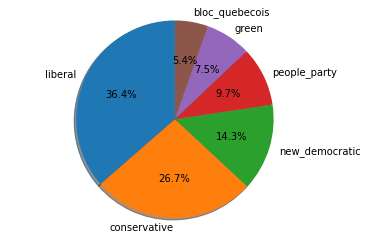

In [21]:
# We show the distribution in a pie chart. We discard 'not_defined' 
pie_df = clean_df[~clean_df['party'].isin(['not_defined'])]

labels = pie_df['party'].value_counts()
labels = list(labels.index)
labels=labels
values = list(pie_df['party'].value_counts())
ax1 = plt.subplot()
ax1.pie(values, labels=labels, autopct="%1.1f%%",
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# 3. Sentiment Analysis

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [23]:
# The following class summarizes the functions to calculate de sentiment with vader

analyzer = SentimentIntensityAnalyzer()
class SentimentAnalyzer:
    def __init__(self, df):
        self.result = df
    def get_simple_sentiment_score(self,sentence):
        return analyzer.polarity_scores(sentence)
    def get_sentiments(self):
        self.result['sentiment_score'] = self.result['content'].apply(lambda t: self.get_simple_sentiment_score(t)['compound'])
        self.result['sentiment'] = self.result['sentiment_score'].apply(lambda s: 'positive' if s > 0.05 else ('negative' if s < -0.05 else 'neutral'))
    def get_result(self):        
        return self.result
    def leave_positive(self):
        self.result = self.result[self.result['sentiment']=='positive']
    def plot_results(self):
        labels = self.result['sentiment'].value_counts()
        labels = list(labels.index)
        labels=labels
        values = list(self.result['sentiment'].value_counts())
        ax1 = plt.subplot()
        ax1.pie(values, labels=labels, autopct="%1.1f%%",
                shadow=True, startangle=90)
        ax1.axis('equal')
        plt.show()


In [24]:
# We will only work with the identified parties. So we will drop the partys [not_defined]
sentiment_input_df = clean_df[~clean_df['party'].isin(['not_defined'])]

# We create an instance of the class and calculate the sentiment
sentiment = SentimentAnalyzer(sentiment_input_df)
sentiment.get_sentiments()
sentiment_df = sentiment.get_result()

# Here we see the results in a new column
sentiment_df

C:\Users\rhenr\AppData\Local\Temp/ipykernel_22036/1467040292.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.result['sentiment_score'] = self.result['content'].apply(lambda t: self.get_simple_sentiment_score(t)['compound'])
C:\Users\rhenr\AppData\Local\Temp/ipykernel_22036/1467040292.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.result['sentiment'] = self.result['sentiment_score'].apply(lambda s: 'positive' if s > 0.05 else ('negative' if s < -0.05 else 'neutral'))


,index,date,content,keyword,content_clean,hashtags,usernames,party,sentiment_score,sentiment
0,0,2021-07-22,@MarkSlapinski No. But #TrudeauMustGo,TrudeauMustGo,"[markslapinski, trudeaumustgo]",[TrudeauMustGo],[MarkSlapinski],liberal,0.0000,neutral
1,1,2021-07-22,If you Vote for Trudeau the Debt will double w...,TrudeauMustGo,"[vote, trudeau, debt, double, justin, enjoys, ...","[TrudeauMustGo, TrudeauWorstPMEver, TrudeauFai...",[],liberal,0.3365,positive
2,2,2021-07-22,@MaureenJanssens Graduated with honours from t...,TrudeauMustGo,"[maureenjanssens, graduated, honours, elmer, f...",[TrudeauMustGo],[MaureenJanssens],liberal,0.4939,positive
3,3,2021-07-22,Canadians don't forget...eh! 🤷🏾‍♂️\n#TrudeauMu...,TrudeauMustGo,"[canadians, forget, trudeaumustgo]",[TrudeauMustGo],[],liberal,0.0000,neutral
4,4,2021-07-22,A gentle soothing reminder that the Liberals a...,TrudeauMustGo,"[gentle, soothing, reminder, liberals, friends...","[TrudeauMustGo, TrudeauFailedCanada, Trudeaufa...",[],liberal,0.3911,positive
...,...,...,...,...,...,...,...,...,...,...
101932,104310,2021-09-20,@EScamdemic @CP24 Did you even read the articl...,@fordnation,"[escamdemic, even, read, article, first, sente...",[DougFord],"[EScamdemic, CP24, fordnation]",conservative,0.5267,positive
101943,104321,2021-09-20,"Ah, a glowing update from a fellow Conservativ...",@fordnation,"[glowing, update, fellow, conservative, run, p...","[killbill124, RNsilentnomore, RPNsilentnomore,...","[celliottability, fordnation]",conservative,0.0000,neutral
101959,104340,2021-09-20,Two days until I'm treated like a leper and a ...,@fordnation,"[two, days, treated, like, leper, second, clas...",[],[Fordnation's],liberal,-0.4215,negative
101961,104343,2021-09-20,@CailinasEirinn @gotothebeach19 @jkenney @ford...,@fordnation,"[cailinaseirinn, gotothebeach, jkenney, fordna...",[],"[CailinasEirinn, gotothebeach19, jkenney, ford...",conservative,0.0000,neutral


In [25]:
# We observed that the sentiment can be improved with some pre-known sentiment based on the hashtags.
# For example, a keyword like 'nevertrudeau' show us that the sentiment is negative. But the Vader Sentiment Analyzer couldn't
# categorize it correctly because the word 'nevertrudeau' doesn't exist in the dictionary.

# So we created a function to clean that ocurrences:

def negative_hashtags(list_tokens,party):
    
    result = False
    
    negative_dict = {
                    'liberal': ['demoncrats','justintrudeauhasgottogo','liberalcorruption','nevertrudeau','nomoresequels','trudeaublackface','trudeaucorruption','trudeaucrimeminister','trudeaudictatorship','trudeaufailedcanada','trudeauhasgottogo','trudeauhimbecile','trudeaumustgo','trudeaumustgonow','trudeaumustgo🇨🇦','trudeaurude','trudeausvanityelection','trudeauworstpmever','votetrudeauout']
                    ,'conservative': ['otooldisaster','otoolethefool','nevervoteconservative','dontvotecpc']
                    ,'new_democratic': []
                    ,'bloc_quebecois':[]
                    ,'green': []
                    ,'people_party': []
                    ,'not_defined':[]
                    }
    
    list_neg = negative_dict[party]

    for token in list_tokens:
        if token in list_neg:
            result = True
    
    return result

In [26]:
# Here we use the function to correct the sentiment
index = sentiment_df[(sentiment_df['party'] =='liberal') & (sentiment_df[['content_clean','party']].apply(lambda x: negative_hashtags(x.content_clean,x.party),axis=1))].index
sentiment_df.loc[index, 'sentiment'] ='negative'

index = sentiment_df[(sentiment_df['party'] =='conservative') & (sentiment_df[['content_clean','party']].apply(lambda x: negative_hashtags(x.content_clean,x.party),axis=1))].index
sentiment_df.loc[index, 'sentiment'] ='negative'

sentiment_df

C:\Users\rhenr\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,index,date,content,keyword,content_clean,hashtags,usernames,party,sentiment_score,sentiment
0,0,2021-07-22,@MarkSlapinski No. But #TrudeauMustGo,TrudeauMustGo,"[markslapinski, trudeaumustgo]",[TrudeauMustGo],[MarkSlapinski],liberal,0.0000,negative
1,1,2021-07-22,If you Vote for Trudeau the Debt will double w...,TrudeauMustGo,"[vote, trudeau, debt, double, justin, enjoys, ...","[TrudeauMustGo, TrudeauWorstPMEver, TrudeauFai...",[],liberal,0.3365,negative
2,2,2021-07-22,@MaureenJanssens Graduated with honours from t...,TrudeauMustGo,"[maureenjanssens, graduated, honours, elmer, f...",[TrudeauMustGo],[MaureenJanssens],liberal,0.4939,negative
3,3,2021-07-22,Canadians don't forget...eh! 🤷🏾‍♂️\n#TrudeauMu...,TrudeauMustGo,"[canadians, forget, trudeaumustgo]",[TrudeauMustGo],[],liberal,0.0000,negative
4,4,2021-07-22,A gentle soothing reminder that the Liberals a...,TrudeauMustGo,"[gentle, soothing, reminder, liberals, friends...","[TrudeauMustGo, TrudeauFailedCanada, Trudeaufa...",[],liberal,0.3911,negative
...,...,...,...,...,...,...,...,...,...,...
101932,104310,2021-09-20,@EScamdemic @CP24 Did you even read the articl...,@fordnation,"[escamdemic, even, read, article, first, sente...",[DougFord],"[EScamdemic, CP24, fordnation]",conservative,0.5267,positive
101943,104321,2021-09-20,"Ah, a glowing update from a fellow Conservativ...",@fordnation,"[glowing, update, fellow, conservative, run, p...","[killbill124, RNsilentnomore, RPNsilentnomore,...","[celliottability, fordnation]",conservative,0.0000,neutral
101959,104340,2021-09-20,Two days until I'm treated like a leper and a ...,@fordnation,"[two, days, treated, like, leper, second, clas...",[],[Fordnation's],liberal,-0.4215,negative
101961,104343,2021-09-20,@CailinasEirinn @gotothebeach19 @jkenney @ford...,@fordnation,"[cailinaseirinn, gotothebeach, jkenney, fordna...",[],"[CailinasEirinn, gotothebeach19, jkenney, ford...",conservative,0.0000,neutral


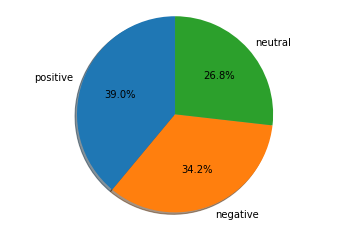

In [27]:
# Finally, we show the results of the sentiment distribution:
sentiment.plot_results()

# 4. Summarizing the results

In [28]:
## Here we remain only the positive tweets to calculate a poll
sentiment.leave_positive()
sentiment_df = sentiment.get_result()

# We add a "week" column to the dataset. It represents a number with the week of the year (weeks from 1 to 52)
sentiment_df['week'] = pd.PeriodIndex(pd.to_datetime(sentiment_df.date), freq='T').week

# We show the results
sentiment_df

C:\Users\rhenr\AppData\Local\Temp/ipykernel_22036/1133199571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['week'] = pd.PeriodIndex(pd.to_datetime(sentiment_df.date), freq='T').week


,index,date,content,keyword,content_clean,hashtags,usernames,party,sentiment_score,sentiment,week
477,518,2021-08-01,Ploy on the side of PPC to seem like actual Co...,TrudeauMustGo,"[ploy, side, ppc, seem, like, actual, conserva...","[cdnpoli, OToole4PM, TrudeauMustGo, Conservati...",[],conservative,0.3612,positive,30
575,625,2021-08-03,@AlanMWD @kevinkeary1 @captrockcod @MichaelBat...,TrudeauMustGo,"[alanmwd, kevinkeary, captrockcod, michaelbato...","[TrudeauCorruption, OToole4PM, TrudeauMustGo]","[AlanMWD, kevinkeary1, captrockcod, MichaelBat...",people_party,0.8591,positive,31
1092,1184,2021-08-14,@brianlilley @erinotoole #TrudeauMustGo I stan...,TrudeauMustGo,"[brianlilley, erinotoole, trudeaumustgo, stand...",[TrudeauMustGo],"[brianlilley, erinotoole, LarocqueCA]",conservative,0.6808,positive,32
1488,1629,2021-08-23,PPC can win seats! But only if people vote wit...,TrudeauMustGo,"[ppc, win, seats, people, vote, hearts, freedo...",[VotePPC],[peoplespca],people_party,0.9459,positive,34
1565,1715,2021-08-25,"If you are in SE NB, come join us to meet Maxi...",TrudeauMustGo,"[come, join, meet, maxime, bernier, ppc, candi...","[VotePPC, TrudeauMustGo]",[JackMinorPPC],people_party,0.3595,positive,34
...,...,...,...,...,...,...,...,...,...,...,...
101889,104266,2021-09-19,@coopSpeak @patrickbrownont is someone that mi...,@fordnation,"[coopspeak, patrickbrownont, someone, might, m...",[],"[coopSpeak, patrickbrownont, fordnation.]",conservative,0.8720,positive,37
101905,104282,2021-09-19,@fordnation @jkenney @DeputyPM_Canada @nationa...,@fordnation,"[fordnation, jkenney, deputypmcanada, national...",[],"[fordnation, jkenney, DeputyPM_Canada, nationa...",conservative,0.2732,positive,37
101911,104288,2021-09-19,@gotothebeach19 @retiredbeachguy @CailinasEiri...,@fordnation,"[gotothebeach, retiredbeachguy, cailinaseirinn...",[],"[gotothebeach19, retiredbeachguy, CailinasEiri...",conservative,0.3195,positive,37
101917,104294,2021-09-19,@jkenney @fordnation @celliottability Surprise...,@fordnation,"[jkenney, fordnation, celliottability, surpris...",[],"[jkenney, fordnation, celliottability]",conservative,0.4939,positive,37


In [29]:
# We build a grouped dataset with only week, party and the count of positive sentiments (i.e. "votes")
result_df = sentiment_df.groupby(['week','party'],as_index=False)['sentiment'].count()

# We show the result
pd.set_option('display.max_rows', 20)
result_df

,week,party,sentiment
0,29,bloc_quebecois,38
1,29,conservative,347
2,29,green,141
3,29,liberal,348
4,29,new_democratic,142
...,...,...,...
55,38,conservative,81
56,38,green,50
57,38,liberal,93
58,38,new_democratic,73


In [30]:
# We calculate a dataframe with the sum of votes per week, to use it to calculate the percentage distribution
result_df_sum = result_df.groupby(['week'],as_index=False)['sentiment'].sum()

# Here we merge the dataset to calculate the percentage of preference per party and week
polls_df = result_df.merge(result_df_sum,how='inner', left_on='week', right_on='week')
polls_df['percentage'] = polls_df['sentiment_x']/polls_df['sentiment_y']

# We rename the columns for a more proper name
polls_df = polls_df.rename(columns={"sentiment_x": "votes_count", "sentiment_y": "votes_count_week"})

# Here is the result
polls_df

,week,party,votes_count,votes_count_week,percentage
0,29,bloc_quebecois,38,1130,0.033628
1,29,conservative,347,1130,0.307080
2,29,green,141,1130,0.124779
3,29,liberal,348,1130,0.307965
4,29,new_democratic,142,1130,0.125664
...,...,...,...,...,...
55,38,conservative,81,351,0.230769
56,38,green,50,351,0.142450
57,38,liberal,93,351,0.264957
58,38,new_democratic,73,351,0.207977


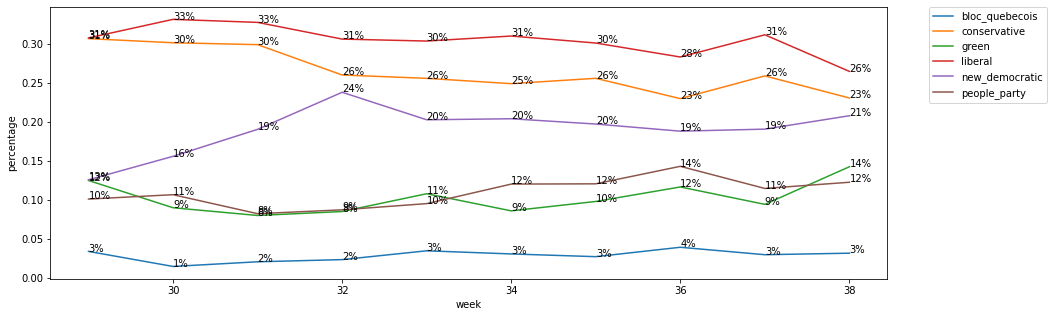

In [31]:
# The following line plot shows the polls per party in the past 10 weeks before the elections
# We observe that the two parties with highest vote preference are the liberal and conservative parties. 
# The next one is the new democratic party

plt.figure(figsize=(15,5))

# line plot
g = sns.lineplot(x='week', y='percentage', hue='party', data=polls_df)
# legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# label points
for x, y in zip(polls_df['week'], polls_df['percentage']):
    plt.text(x = x, y = y, s = '{:.0%}'.format(y)) # set colour of line

In [32]:
# We will use cv2 to show the polls image
import cv2
import matplotlib.pyplot as plt
import numpy as np

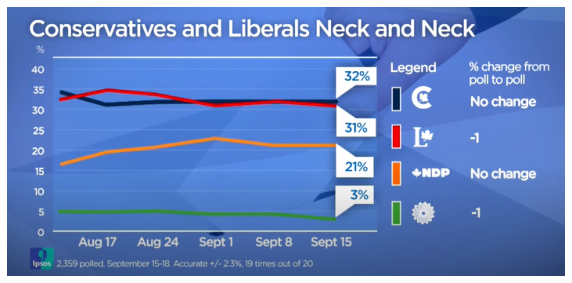

In [33]:
# We also observe in the image that the leading parties are the liberal and conservatives, followed by the new democratic party

image_bgr = cv2.imread('ipsos_poll_sept19.png', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(image_rgb), plt.axis('off')
plt.show()

# 5. Conclusions